# Instrucciones para examen / Elida Peña
**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de precios de casas. Utilizaremos el «House Prices Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «House Prices Dataset» contiene datos sobre diversas características de casas residenciales en Ames, Iowa. La tarea es predecir el precio final de cada casa (variable objetivo) en función de sus características.
Diccionario de Datos:

**MSSubClass:** Clase del edificio.

**MSZoning:** Clasificación de la zona.

**LotFrontage:** Frente del lote en pies lineales.

**LotArea:** Área del lote en pies cuadrados.

**Street:** Tipo de calle.

**Alley:** Tipo de callejón.

**LotShape:** Forma del lote.

**LandContour:** Contorno del terreno.

**Utilities:** Servicios públicos disponibles.

**LotConfig:** Configuración del lote.

**LandSlope:** Pendiente del terreno.

**Neighborhood:** Vecindario.

**BldgType:** Tipo de edificio.

**HouseStyle:** Estilo de la casa.

**OverallQual:** Calidad general del material y acabado.

**OverallCond:** Condición general del edificio.

**YearBuilt:** Año de construcción original.

**YearRemodAdd:** Año de remodelación o adición.

**RoofStyle:** Estilo del techo.

**RoofMatl:** Material del techo.
**Exterior1st:** Revestimiento exterior de la casa.

**Exterior2nd:** Revestimiento exterior de la casa (segundo).

**MasVnrType:** Tipo de revestimiento de mampostería.

**MasVnrArea:** Área de revestimiento de mampostería en pies cuadrados.

**ExterQual:** Calidad del material exterior.

**ExterCond:** Condición del material exterior.

**Foundation:** Tipo de fundación.

**BsmtQual:** Altura del sótano.

**BsmtCond:** Condición general del sótano.

**BsmtExposure:** Exposición del sótano.

**BsmtFinType1:** Calidad del acabado del sótano.

**BsmtFinSF1:** Área terminada del sótano en pies cuadrados.

**BsmtFinType2:** Calidad del acabado del sótano (segunda).

**BsmtFinSF2:** Área terminada del sótano (segunda) en pies cuadrados.

**BsmtUnfSF:** Área no terminada del sótano en pies cuadrados.

**TotalBsmtSF:** Área total del sótano en pies cuadrados.

**Heating:** Tipo de calefacción.

**HeatingQC:** Calidad y condición de la calefacción.

**CentralAir:** Aire acondicionado central.

**Electrical:** Sistema eléctrico.

**1stFlrSF:** Área del primer piso en pies cuadrados.

**2ndFlrSF:** Área del segundo piso en pies cuadrados.

**LowQualFinSF:** Área terminada de baja calidad en pies cuadrados.

**GrLivArea:** Área habitable por encima del nivel del suelo en pies cuadrados.

**BsmtFullBath:** Número de baños completos en el sótano.

**BsmtHalfBath:** Número de medios baños en el sótano.

**FullBath:** Número de baños completos por encima del nivel del suelo.

**HalfBath:** Número de medios baños por encima del nivel del suelo.

**Bedroom:** Número de dormitorios por encima del nivel del suelo.

**Kitchen:** Número de cocinas.

**KitchenQual:** Calidad de la cocina.

**TotRmsAbvGrd:** Número total de habitaciones por encima del nivel del suelo (excluyendo baños).

**Functional:** Funcionalidad del hogar.

**Fireplaces:** Número de chimeneas.

**FireplaceQu**: Calidad de la chimenea.

**GarageType:** Ubicación del garaje.

**GarageYrBlt:** Año en que se construyó el garaje.

**GarageFinish:** Interior terminado del garaje.

**GarageCars:** Tamaño del garaje en capacidad de coches.

**GarageArea:** Área del garaje en pies cuadrados.

**GarageQual:** Calidad del garaje.

**GarageCond:** Condición del garaje.

**PavedDrive:** Entrada pavimentada.

**WoodDeckSF:** Área de la terraza de madera en pies cuadrados.

**OpenPorchSF:** Área del porche abierto en pies cuadrados.

**EnclosedPorch:** Área del porche cerrado en pies cuadrados.

**3SsnPorch:** Área del porche de tres estaciones en pies cuadrados.

**ScreenPorch:** Área del porche de la pantalla en pies cuadrados.

**PoolArea:** Área de la piscina en pies cuadrados.

**PoolQC:** Calidad de la piscina.

**Fence:** Calidad de la cerca.

**MiscFeature:** Característica miscelánea no cubierta en otras categorías.

**MiscVal:** Valor misceláneo.

**MoSold:** Mes en que se vendió la propiedad.

**YrSold:** Año en que se vendió la propiedad.

**SaleType:** Tipo de venta.

**SaleCondition:** Condición de venta.

**SalePrice:** Precio de venta (variable objetivo).

In [108]:
# Importacion de librerias para este examen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

Requisitos

**1. Limpieza de Datos:**
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que * representen lo mismo.

* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [ ]:
# Definir ruta de sample_submision
sample_path = '../data/sample_submission.csv'
# Cargar los conjuntos de datos
sample = pd.read_csv(sample_path, sep=',', header=0)
sample.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
# Definir la ruta del archivo train y test
train_path = '../data/train.csv'
test_path = '../data/test.csv'

# Cargar los conjuntos de datos
train = pd.read_csv(train_path, sep=',', header=0)
test = pd.read_csv(test_path, sep=',', header=0)


Forma del conjunto de entrenamiento antes de eliminar duplicados: (1460, 81)
Forma del conjunto de entrenamiento después de eliminar duplicados: (1460, 81)


In [ ]:
# visualizar las primeras filas del dataset train
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,pave,nan,reg,lvl,allpub,...,0,nan,nan,nan,0,2,2008,wd,normal,208500
1,2,20,RL,80.0,9600,pave,nan,reg,lvl,allpub,...,0,nan,nan,nan,0,5,2007,wd,normal,181500
2,3,60,RL,68.0,11250,pave,nan,ir1,lvl,allpub,...,0,nan,nan,nan,0,9,2008,wd,normal,223500
3,4,70,RL,60.0,9550,pave,nan,ir1,lvl,allpub,...,0,nan,nan,nan,0,2,2006,wd,abnorml,140000
4,5,60,RL,84.0,14260,pave,nan,ir1,lvl,allpub,...,0,nan,nan,nan,0,12,2008,wd,normal,250000


In [ ]:
# visualizar las primeras filas del dataset test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,rh,80.0,11622,pave,nan,reg,lvl,allpub,...,120,0,nan,mnprv,nan,0,6,2010,wd,normal
1,1462,20,RL,81.0,14267,pave,nan,ir1,lvl,allpub,...,0,0,nan,nan,gar2,12500,6,2010,wd,normal
2,1463,60,RL,74.0,13830,pave,nan,ir1,lvl,allpub,...,0,0,nan,mnprv,nan,0,3,2010,wd,normal
3,1464,60,RL,78.0,9978,pave,nan,ir1,lvl,allpub,...,0,0,nan,nan,nan,0,6,2010,wd,normal
4,1465,120,RL,43.0,5005,pave,nan,ir1,hls,allpub,...,144,0,nan,nan,nan,0,1,2010,wd,normal


In [69]:
# Verificar duplicados en el conjunto de entrenamiento (train)
duplicados_train = train.duplicated().sum()
print(f"Número de filas duplicadas en train: {duplicados_train}")
# Verificar duplicados en el conjunto de prueba (test)
duplicados_test = test.duplicated().sum()
print(f"Número de filas duplicadas en test: {duplicados_test}")


Número de filas duplicadas en train: 0
Número de filas duplicadas en test: 0


* No hay duplicados en train ni test

In [ ]:
# Verificar los tipos de datos de las columnas de train
print(train.dtypes)

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object


In [ ]:
# Verificar los tipos de las columnas de test
print(test.dtypes)

Id                  int64
MSSubClass       category
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MiscVal             int64
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
Length: 80, dtype: object


In [ ]:
# Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que * representen lo mismo.
#  Columnas categóricas según el diccionario proporcionado
categorical_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
    'MiscFeature', 'SaleType', 'SaleCondition'
]

# Columnas numéricas según el diccionario proporcionado
numerical_columns = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom',
    'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

# Convertir columnas categóricas a tipo 'category'
for col in categorical_columns:
    if col in train.columns:
        train[col] = train[col].astype('category')
    if col in test.columns:
        test[col] = test[col].astype('category')

# Convertir columnas numéricas a tipo numérico (float o int)
for col in numerical_columns:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce')
    if col in test.columns:
        test[col] = pd.to_numeric(test[col], errors='coerce')

# Verificación de la conversión
print("Tipos de datos de train después de la conversión:")
print(train.info())
print("\nTipos de datos de test después de la conversión:")
print(test.info())


Tipos de datos de train después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null

In [ ]:
# Verificacion de los tipos convertidos /train
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [ ]:
# Verificacion de los tipos convertidos /test
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   category
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

**Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.**

In [73]:
# Mostrar los valores únicos en cada columna categórica
for col in train.select_dtypes(include=['category']).columns:
    unique_values_train = train[col].unique()
    unique_values_test = test[col].unique()
    print(f"Columna '{col}' en train: {unique_values_train}")
    print(f"Columna '{col}' en test: {unique_values_test}")
    print("-" * 50)


Columna 'MSSubClass' en train: ['60', '20', '70', '50', '190', ..., '80', '160', '75', '180', '40']
Length: 15
Categories (15, object): ['120', '160', '180', '190', ..., '75', '80', '85', '90']
Columna 'MSSubClass' en test: ['20', '60', '120', '160', '80', ..., '70', '75', '180', '40', '150']
Length: 16
Categories (16, object): ['120', '150', '160', '180', ..., '75', '80', '85', '90']
--------------------------------------------------
Columna 'MSZoning' en train: ['RL', 'RM', 'C', 'fv', 'rh']
Categories (5, object): ['C', 'RL', 'RM', 'fv', 'rh']
Columna 'MSZoning' en test: ['rh', 'RL', 'RM', 'fv', 'C', 'nan']
Categories (6, object): ['C', 'RL', 'RM', 'fv', 'nan', 'rh']
--------------------------------------------------
Columna 'Street' en train: ['pave', 'grvl']
Categories (2, object): ['grvl', 'pave']
Columna 'Street' en test: ['pave', 'grvl']
Categories (2, object): ['grvl', 'pave']
--------------------------------------------------
Columna 'Alley' en train: ['nan', 'grvl', 'pave']
C

In [115]:
# Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
# Reemplazar valores específicos en MSZoning
train['MSZoning'] = train['MSZoning'].replace({'c': 'C', 'fv': 'FV', 'nan': 'none'})
test['MSZoning'] = test['MSZoning'].replace({'c': 'C', 'fv': 'FV', 'nan': 'none'})



C:\Users\59598\AppData\Local\Temp\ipykernel_7520\3641200584.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train['MSZoning'] = train['MSZoning'].replace({'c': 'C', 'fv': 'FV', 'nan': 'none'})
C:\Users\59598\AppData\Local\Temp\ipykernel_7520\3641200584.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  test['MSZoning'] = test['MSZoning'].replace({'c': 'C', 'fv': 'FV', 'nan': 'none'})


In [116]:
# Convertir a minúsculas y eliminar espacios en blanco para todas las columnas categóricas
for col in train.select_dtypes(include=['category']).columns:
    # Verificar si la columna está en ambos conjuntos y es categórica
    if col in test.columns:
        train[col] = train[col].str.strip().str.lower().astype('category')
        test[col] = test[col].str.strip().str.lower().astype('category')

# Unificación manual adicional si es necesario
# Ejemplo:
train['Alley'] = train['Alley'].replace({'grvl': 'Gravel', 'pave': 'Paved'})
test['Alley'] = test['Alley'].replace({'grvl': 'Gravel', 'pave': 'Paved'})


In [85]:
# Agregar 'none' como categoría válida antes de rellenar los NaN
for col in train.select_dtypes(include=['category']).columns:
    if 'none' not in train[col].cat.categories:
        train[col] = train[col].cat.add_categories('none')
    train[col] = train[col].fillna('none')

    if col in test.columns:
        if 'none' not in test[col].cat.categories:
            test[col] = test[col].cat.add_categories('none')
        test[col] = test[col].fillna('none')



In [86]:
# Verificación final de valores únicos en columnas categóricas
for col in train.select_dtypes(include=['category']).columns:
    print(f"Columna '{col}' en train después de la limpieza: {train[col].unique()}")
    if col in test.columns:
        print(f"Columna '{col}' en test después de la limpieza: {test[col].unique()}")
    print("-" * 50)


Columna 'MSSubClass' en train después de la limpieza: ['60', '20', '70', '50', '190', ..., '80', '160', '75', '180', '40']
Length: 15
Categories (16, object): ['120', '160', '180', '190', ..., '80', '85', '90', 'none']
Columna 'MSSubClass' en test después de la limpieza: ['20', '60', '120', '160', '80', ..., '70', '75', '180', '40', '150']
Length: 16
Categories (17, object): ['120', '150', '160', '180', ..., '80', '85', '90', 'none']
--------------------------------------------------
Columna 'MSZoning' en train después de la limpieza: ['rl', 'rm', 'c', 'fv', 'rh']
Categories (6, object): ['c', 'fv', 'rh', 'rl', 'rm', 'none']
Columna 'MSZoning' en test después de la limpieza: ['rh', 'rl', 'rm', 'fv', 'c', 'none']
Categories (6, object): ['c', 'fv', 'none', 'rh', 'rl', 'rm']
--------------------------------------------------
Columna 'Street' en train después de la limpieza: ['pave', 'grvl']
Categories (3, object): ['grvl', 'pave', 'none']
Columna 'Street' en test después de la limpieza: 

**Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [87]:
# Identificar valores faltantes
missing_values_train = train.isnull().sum()
missing_values_test = test.isnull().sum()

# Mostrar las columnas con valores faltantes
print("Valores faltantes en el conjunto de entrenamiento:")
print(missing_values_train[missing_values_train > 0])
print("\nValores faltantes en el conjunto de prueba:")
print(missing_values_test[missing_values_test > 0])


Valores faltantes en el conjunto de entrenamiento:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Valores faltantes en el conjunto de prueba:
LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [ ]:
# Reemplaza los valores nulos en la columna 'LotFrontage' del DataFrame 'train' 
# con la mediana de la misma columna. Esto ayuda a manejar valores faltantes 
# utilizando un valor estadístico representativo.
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
# Realiza lo mismo para el DataFrame 'test', reemplazando valores nulos en 'LotFrontage' 
# con la mediana de 'LotFrontage' en 'test'.
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())


In [ ]:
# Reemplaza los valores nulos en la columna 'MasVnrArea' del DataFrame 'train' 
# con la mediana de la misma columna.
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
# Realiza lo mismo para el DataFrame 'test', reemplazando valores nulos en 'MasVnrArea' 
# con la mediana de 'MasVnrArea' en 'test'.
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())
# Reemplaza los valores nulos en la columna 'GarageYrBlt' del DataFrame 'train' 
# con la mediana de la misma columna. Se usa la mediana porque suele ser robusta 
# ante valores extremos, lo que es útil en imputación de valores.
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
# Hace lo mismo para el DataFrame 'test', reemplazando valores nulos en 'GarageYrBlt' 
# con la mediana de 'GarageYrBlt' en 'test'.
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

In [93]:
# Imputación de valores faltantes numéricos en el conjunto de prueba
numeric_cols_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for col in numeric_cols_test:
    test[col].fillna(test[col].median())

# Si hay columnas categóricas, imputarlas con la moda
for col in test.select_dtypes(include=['category', 'object']).columns:
    if test[col].isnull().sum() > 0:
        test[col].fillna(test[col].mode()[0])


In [ ]:
# Verifica los calores faltantes luego de la imputacion
print("Valores faltantes después de la imputación en el conjunto de entrenamiento:")
print(train.isnull().sum().sum())

print("Valores faltantes después de la imputación en el conjunto de prueba:")
print(test.isnull().sum().sum())


Valores faltantes después de la imputación en el conjunto de entrenamiento:
0
Valores faltantes después de la imputación en el conjunto de prueba:
0


**Exploración de Datos:**

* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

<Figure size 1200x800 with 0 Axes>

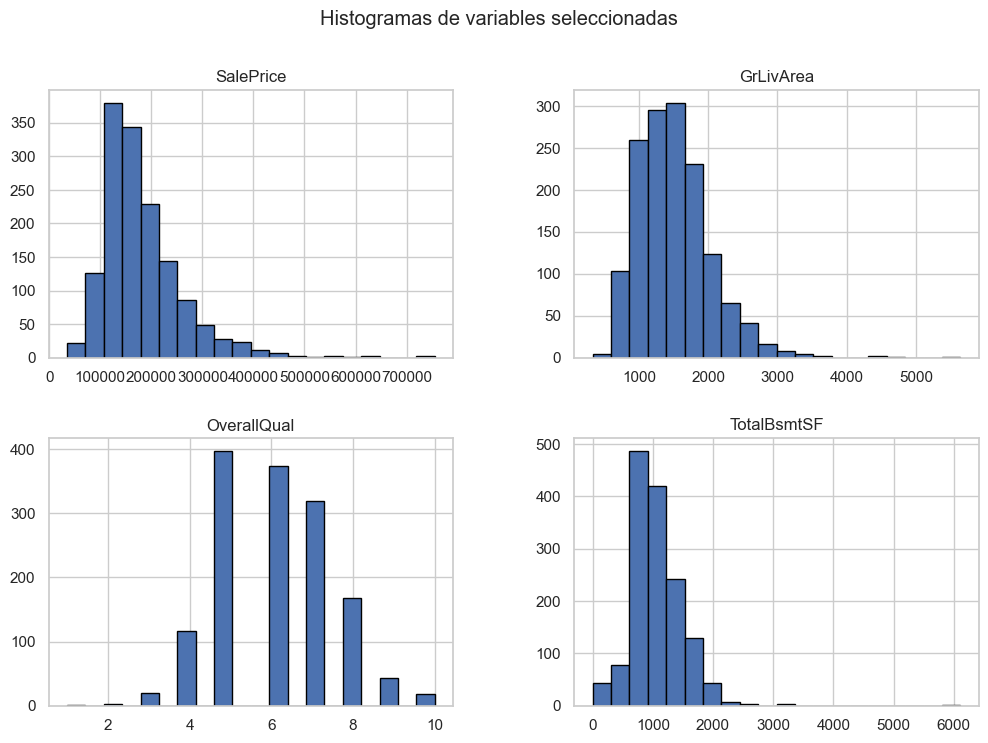

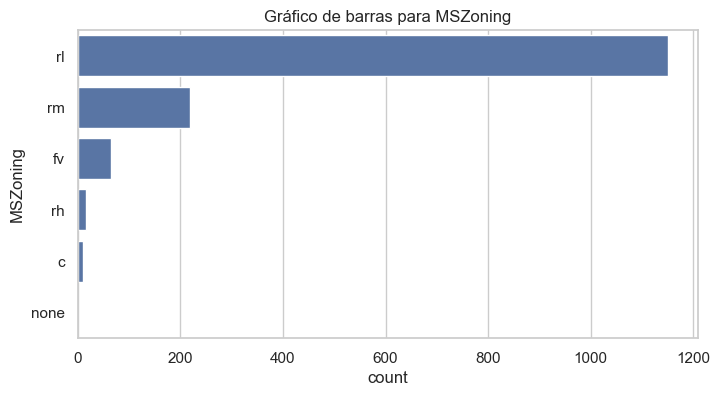

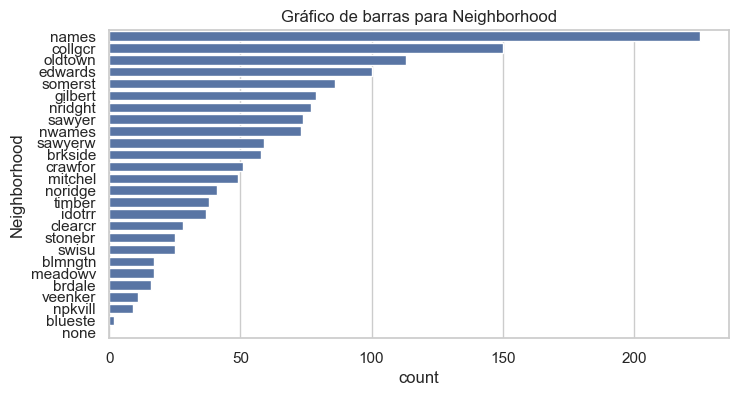

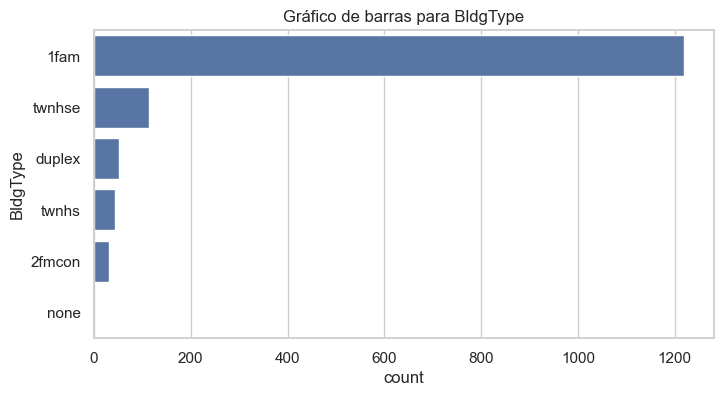

In [102]:
# Seleccionar variables numéricas relevantes
num_cols = ['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF']
# Generar histogramas para variables numéricas seleccionadas
plt.figure(figsize=(12, 8))
train[num_cols].hist(bins=20, figsize=(12, 8), layout=(2, 2), edgecolor='black')
plt.suptitle('Histogramas de variables seleccionadas')
plt.show()

# Seleccionar variables categóricas relevantes
cat_cols = ['MSZoning', 'Neighborhood', 'BldgType']
# Generar gráficos de barras para variables categóricas seleccionadas
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, y=col, order=train[col].value_counts().index)
    plt.title(f'Gráfico de barras para {col}')
    plt.show()

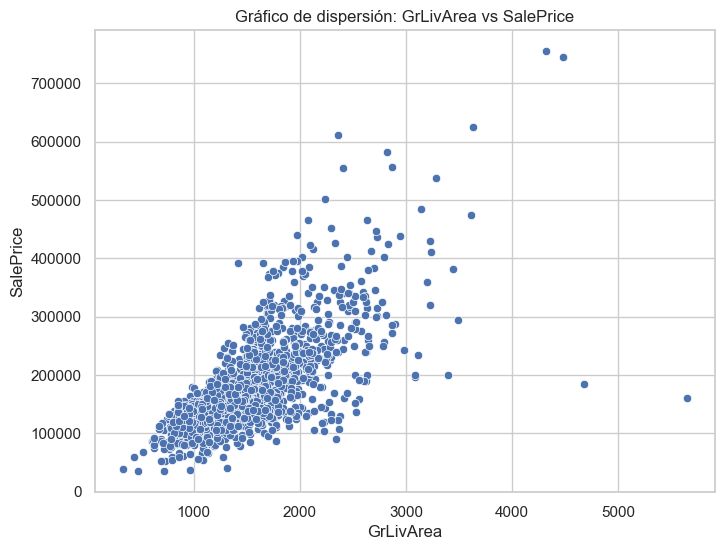

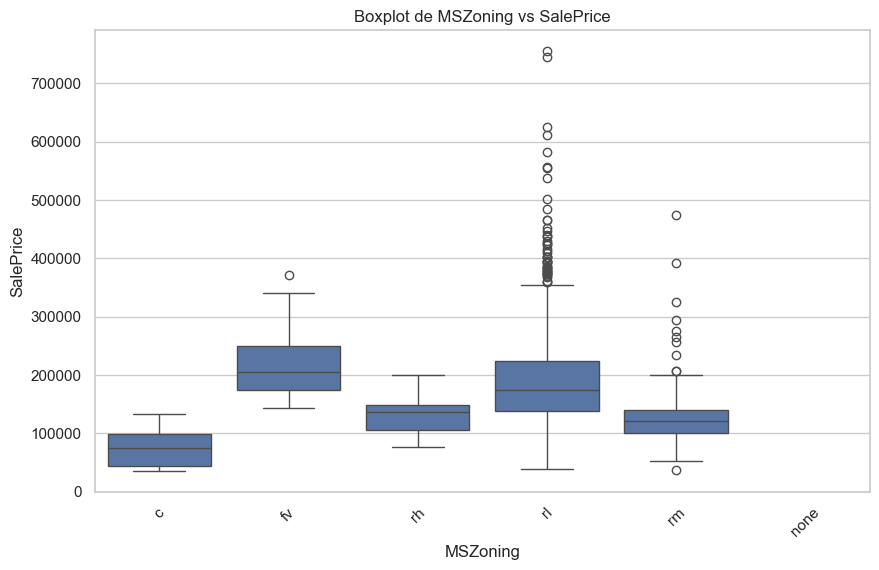

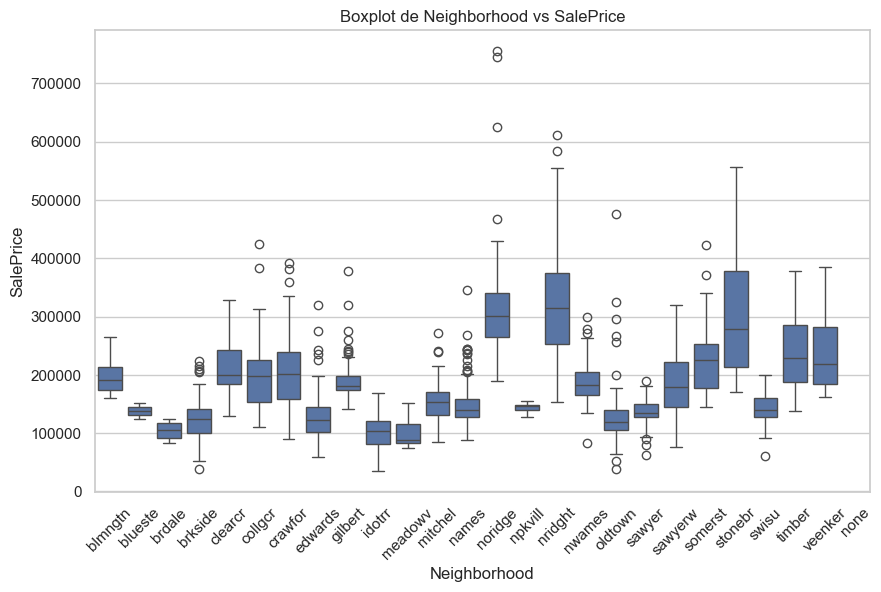

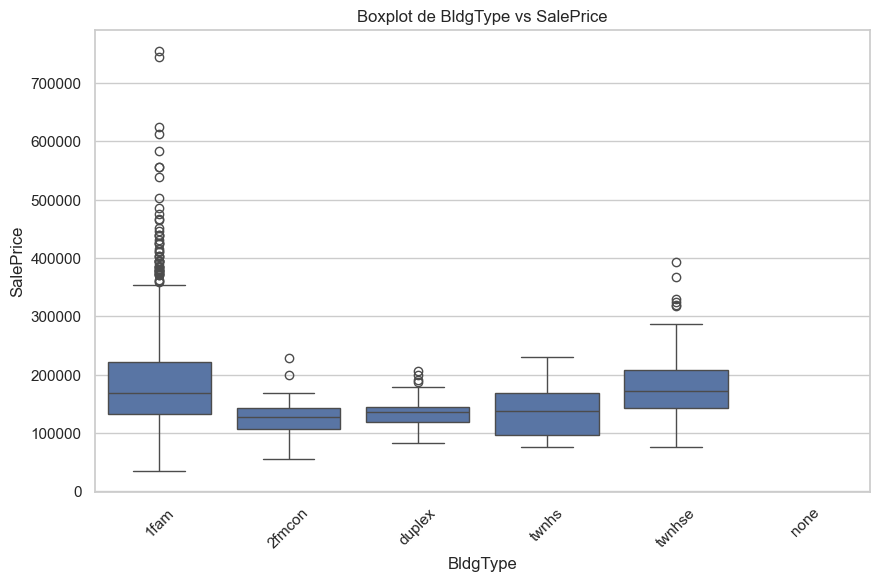

In [103]:
# Gráfico de dispersión: relación entre GrLivArea y SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='GrLivArea', y='SalePrice')
plt.title('Gráfico de dispersión: GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Boxplots: relación entre variables categóricas y SalePrice
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x=col, y='SalePrice')
    plt.title(f'Boxplot de {col} vs SalePrice')
    plt.xticks(rotation=45)
    plt.show()


**Descripcion**

**1. Histogramas de variables numéricas seleccionadas (SalePrice, GrLivArea, OverallQual, TotalBsmtSF):**

**SalePrice:** El histograma muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de las propiedades tienen precios de venta más bajos, mientras que algunas tienen precios mucho más altos.

**GrLivArea (Área habitable por encima del suelo):** La mayoría de las casas tienen un área habitable concentrada en torno a 1,000-2,000 pies cuadrados, con algunas excepciones hacia áreas mucho más grandes.

**OverallQual (Calidad general):** La distribución muestra que la mayoría de las casas tienen una calidad general de material y acabado entre 5 y 7, con pocas de calidades muy bajas o muy altas.

**TotalBsmtSF** (Área total del sótano): Similar al área habitable, hay un gran número de casas con un tamaño de sótano relativamente pequeño a mediano, y algunas propiedades tienen sótanos significativamente más grandes.

**2. Gráficos de barras de variables categóricas seleccionadas (MSZoning, Neighborhood, BldgType):**

**MSZoning (Clasificación de la zona):** El gráfico muestra que la mayoría de las propiedades están clasificadas como 'RL' (Residential Low Density). Otras clasificaciones tienen menos propiedades.

**Neighborhood (Vecindario):** Hay una gran variedad de vecindarios, con algunos como 'NAmes', 'CollgCr', y 'OldTown' predominando en número.

**BldgType (Tipo de Edificio):** La mayoría de las propiedades son casas unifamiliares ('1Fam'), con pocos dúplex, townhouses y otros tipos de construcción.

**3.Gráfico de dispersión de GrLivArea vs SalePrice:**

* Este gráfico muestra una relación positiva entre el área habitable por encima del suelo y el precio de venta. En general, a medida que el área habitable aumenta, el precio de venta también tiende a ser mayor, aunque hay algunos valores atípicos con áreas grandes y precios de venta bajos.
Boxplots de MSZoning, Neighborhood y BldgType vs SalePrice:

**4.Boxplot de MSZoning vs SalePrice:** Las propiedades en la zona 'RL' tienden a tener precios de venta más altos, con una amplia dispersión. Las zonas 'RM' y 'C' muestran precios de venta más bajos.

**Boxplot de Neighborhood vs SalePrice:** Hay una variación significativa en los precios de venta según el vecindario. Algunos vecindarios como 'NridgHt' tienen precios de venta más altos, mientras que otros como 'MeadowV' y 'IDOTRR' muestran precios más bajos.

**Boxplot de BldgType vs SalePrice:** Las casas unifamiliares ('1Fam') tienden a tener precios de venta más altos, mientras que otros tipos de edificios, como los townhouses ('TwnhsE', 'TwnhsI'), muestran precios más bajos.


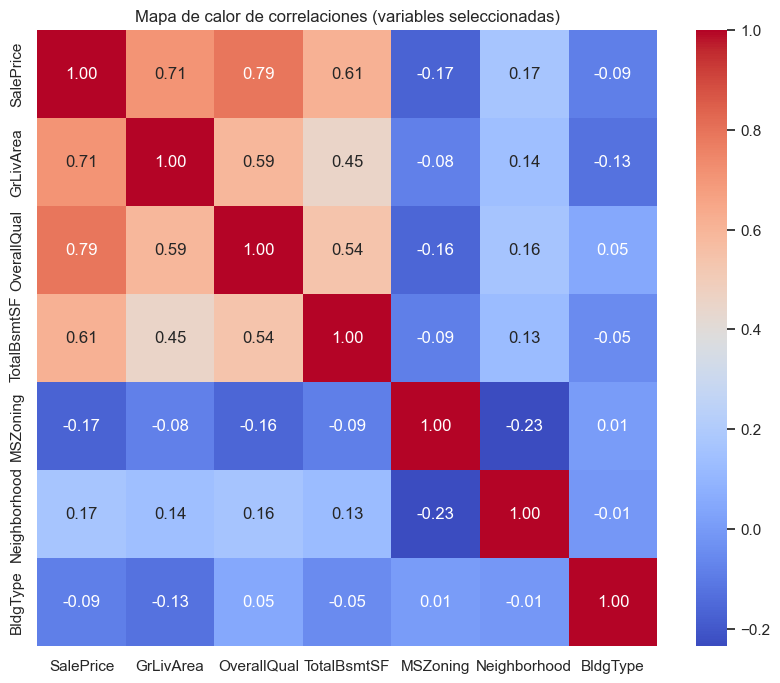

In [104]:
from sklearn.preprocessing import LabelEncoder

# Copiar el DataFrame y codificar las variables categóricas seleccionadas
train_encoded = train.copy()
for col in cat_cols:
    train_encoded[col] = LabelEncoder().fit_transform(train_encoded[col].astype(str))

# Crear un mapa de calor de correlación para las variables seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix = train_encoded[num_cols + cat_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlaciones (variables seleccionadas)')
plt.show()


**1. Correlación de SalePrice:**

* SalePrice tiene una alta correlación positiva con OverallQual (0.79) y GrLivArea (0.71). Esto indica que la calidad general de la casa y el área habitable sobre el suelo tienen una fuerte relación con el precio de venta.

* TotalBsmtSF también tiene una correlación positiva (0.61) con SalePrice, lo que muestra que el área total del sótano influye en el precio.

* Las correlaciones negativas con variables como MSZoning, Neighborhood y BldgType son más bajas, indicando una relación débil o inexistente.

**2. Interpretación de correlaciones:**

* Las correlaciones cercanas a 1 o -1 indican relaciones lineales más fuertes, mientras que valores cercanos a 0 indican relaciones más débiles.

* La correlación de GrLivArea con SalePrice (0.71) muestra que a mayor área habitable, el precio tiende a ser más alto.

* MSZoning y Neighborhood tienen correlaciones más débiles con SalePrice y entre otras variables, lo que indica que no hay una fuerte relación lineal en comparación con variables como OverallQual.

**3. Significado de los colores:**

* Colores rojizos representan correlaciones positivas fuertes, mientras que los tonos azules indican correlaciones negativas o débiles.

* El eje diagonal tiene valores de 1, ya que cada variable está perfectamente correlacionada consigo misma.

**Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [106]:
# Filtrar solo columnas numéricas
numeric_columns = train.select_dtypes(include=['number'])

# Calcular estadísticas descriptivas para las columnas numéricas
numerical_stats = numeric_columns.describe().T
numerical_stats['median'] = numeric_columns.median()
numerical_stats['mode'] = numeric_columns.mode().iloc[0]
numerical_stats['range'] = numeric_columns.max() - numeric_columns.min()

# Mostrar estadísticas descriptivas para las columnas numéricas
print("Estadísticas descriptivas para las variables numéricas:")
print(numerical_stats[['mean', 'median', 'mode', 'std', 'range']])

# Calcular estadísticas para variables categóricas
categorical_columns = train.select_dtypes(include=['category', 'object']).columns
categorical_stats = {}
for col in categorical_columns:
    categorical_stats[col] = {
        'mode': train[col].mode()[0],  # Moda
        'unique_values': train[col].nunique(),  # Número de valores únicos
        'most_frequent': train[col].value_counts().idxmax(),  # Valor más frecuente
        'frequency': train[col].value_counts().max()  # Frecuencia del valor más frecuente
    }

print("\nEstadísticas descriptivas para las variables categóricas:")
for col, stats in categorical_stats.items():
    print(f"{col}: {stats}")


Estadísticas descriptivas para las variables numéricas:
                        mean    median      mode           std     range
Id                730.500000     730.5       1.0    421.610009    1459.0
LotFrontage        69.863699      69.0      69.0     22.027677     292.0
LotArea         10516.828082    9478.5    7200.0   9981.264932  213945.0
OverallQual         6.099315       6.0       5.0      1.382997       9.0
OverallCond         5.575342       5.0       5.0      1.112799       8.0
YearBuilt        1971.267808    1973.0    2006.0     30.202904     138.0
YearRemodAdd     1984.865753    1994.0    1950.0     20.645407      60.0
MasVnrArea        103.117123       0.0       0.0    180.731373    1600.0
BsmtFinSF1        443.639726     383.5       0.0    456.098091    5644.0
BsmtFinSF2         46.549315       0.0       0.0    161.319273    1474.0
BsmtUnfSF         567.240411     477.5       0.0    441.866955    2336.0
TotalBsmtSF      1057.429452     991.5       0.0    438.705324    61

**3. Implementación de Modelos:**

* **Modelos de Regresión:** Implementa modelos de Linear Regression y LightGBM (LGBM).

* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.

* **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Implementación de Modelos de Regresión**

In [109]:
X = train.drop(columns=['SalePrice'])  # Características
y = train['SalePrice']  # Variable objetivo

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
# Asegúrate de que ambas matrices tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


**Modelo de Regresión Lineal**

In [111]:
# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}, R^2: {r2_linear:.2f}")


Linear Regression - MSE: 4964874101.45, RMSE: 70461.86, R^2: 0.35


**Modelo LightGBM (LGBM)**

In [112]:
# Crear y entrenar el modelo LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluar el modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - MSE: {mse_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R^2: {r2_lgb:.2f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3477
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 203
[LightGBM] [Info] Start training from score 181441.541952
LightGBM - MSE: 860947626.26, RMSE: 29341.91, R^2: 0.89


**Comparación de Rendimiento**

In [113]:
print("\nComparación de Modelos:")
print(f"Linear Regression - MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}, R^2: {r2_linear:.2f}")
print(f"LightGBM - MSE: {mse_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R^2: {r2_lgb:.2f}")



Comparación de Modelos:
Linear Regression - MSE: 4964874101.45, RMSE: 70461.86, R^2: 0.35
LightGBM - MSE: 860947626.26, RMSE: 29341.91, R^2: 0.89


### Ventajas y Desventajas de los Modelos
- **Linear Regression**:
  - **Ventajas**: Fácil de interpretar, rápida de entrenar.
  - **Desventajas**: No captura relaciones no lineales, sensible a outliers.
- **LightGBM (LGBM)**:
  - **Ventajas**: Captura relaciones no lineales, eficiente con grandes datasets.
  - **Desventajas**: Puede ser más propenso a sobreajuste si no se ajusta correctamente.

### Análisis de Resultados
- El modelo de **regresión lineal** tuvo un R² de 0.35, indicando un underfitting.
- El modelo **LightGBM** logró un R² de 0.89, mostrando un mejor ajuste a los datos.
